# video game sales From 1980 to 2020 

In [33]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go

In [34]:
video_game_sales= pd.read_csv('C://Users//mande//OneDrive//Desktop//data_sets/Video_Games.csv')

In [35]:
df=pd.DataFrame(video_game_sales)
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Count the occurrences of each genre
genre_counts = df['Genre'].value_counts()
genre_counts

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

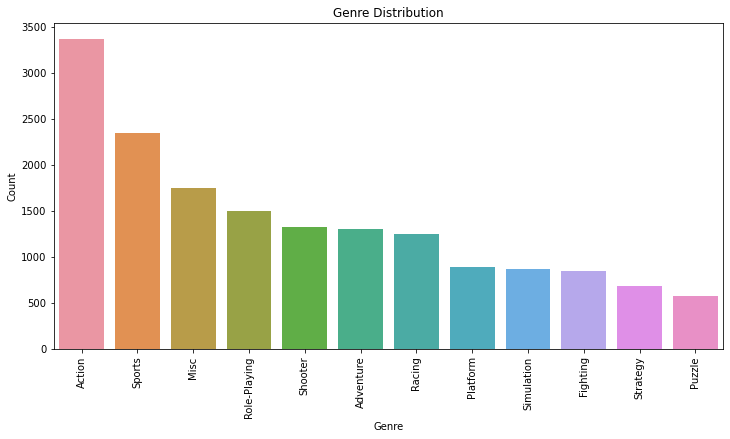

In [37]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create bar plot using seaborn
sns.barplot(x=genre_counts.index, y=genre_counts.values)

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

According to data research, action games are the most popular, with 3370 copies sold, followed by sports games with 2348 units. Miscellaneous and role-playing games did well as well, selling 1750 and 1500 units, respectively. Strategy and puzzle games, on the other hand, were the least popular of the mentioned genres, with 683 and 580 copies sold, respectively. These data suggest that action and sports games have a high market demand, but strategy and puzzle games may require more attention to attract more players and sales.

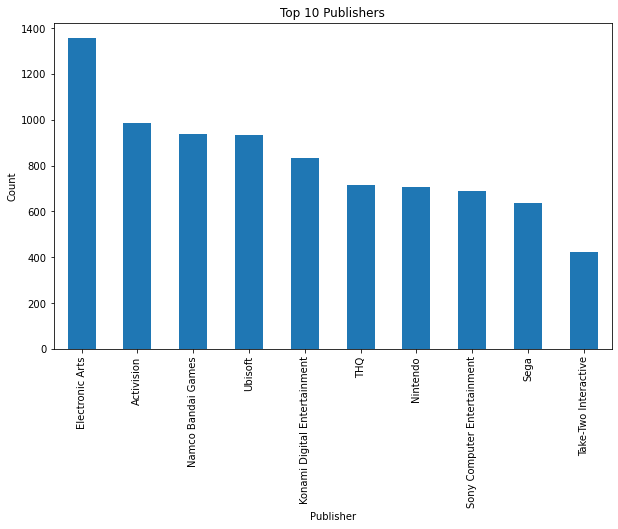

In [38]:
# Counting the occurrences of each publisher
publisher_counts = df['Publisher'].value_counts()

# Sorting the publisher counts in descending order
publisher_counts = publisher_counts.sort_values(ascending=False)

# Selecting the top 10 publishers for better visualization
top_10_publishers = publisher_counts.head(10)

# Plotting the data
plt.figure(figsize=(10, 6))
top_10_publishers.plot(kind='bar')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.title('Top 10 Publishers')
plt.show()

Take-Two Interactive is a well-known video game publisher best known for titles such as Grand Theft Auto and NBA 2K. While they have an amazing catalogue, they have substantially less released games than the other studios mentioned, with around 500 titles. There isn't enough information known about Saga to offer specifics about their game publishing history in less than 50 words.

In [39]:
global_sales = df.groupby('Name')['Global_Sales'].sum()
NA_Sales = df.groupby('Name')['NA_Sales'].sum()
EU_Sales = df.groupby('Name')['EU_Sales'].sum()
JP_Sales = df.groupby('Name')['JP_Sales'].sum()
Other_Sales = df.groupby('Name')['Other_Sales'].sum()

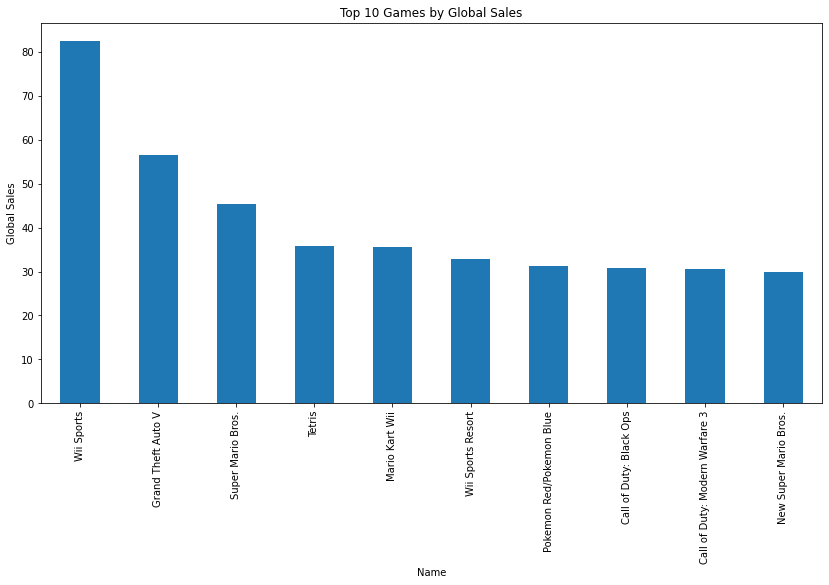

In [40]:
# Sorting the sales in descending order
Name = global_sales .sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(14, 7))
Name.head(10).plot(kind='bar')
plt.xlabel('Name')
plt.ylabel('Global Sales')
plt.title('Top 10 Games by Global Sales')
plt.show()

The top-selling games globally From 1980 to 2020, in no particular order, include FIFA (wii sports), GTA 5, Super Mario Bros, Tetris, Mario Kart Wii, Wii Sports Resort, Pokémon, Call of Duty, Call of Duty: Modern Warfare 3, and New Super Mario. These games have achieved significant commercial success across various platforms and genres.

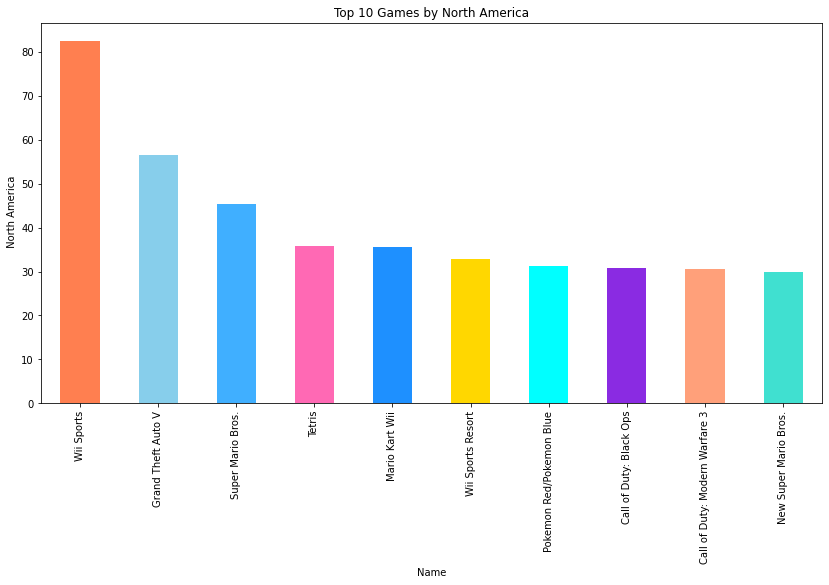

In [41]:
# Assuming 'df' is your pandas DataFrame containing the columns 'Name' and 'Global_Sales'

# Grouping by 'Name' and summing the 'Global_Sales'
NA_Sales = df.groupby('Name')['Global_Sales'].sum()

# Sorting the sales in descending order
NA_Sales = NA_Sales.sort_values(ascending=False)

# Defining custom colors for the bars
colors = ['#FF7F50', '#87CEEB', '#40AFFF', '#FF69B4', '#1E90FF', '#FFD700', '#00FFFF', '#8A2BE2', '#FFA07A', '#40E0D0']

# Plotting the data with custom colors
plt.figure(figsize=(14, 7))
NA_Sales.head(10).plot(kind='bar', color=colors)
plt.xlabel('Name')
plt.ylabel(' North America')
plt.title('Top 10 Games by North America')
plt.show()

similar tread can be seen in north america 

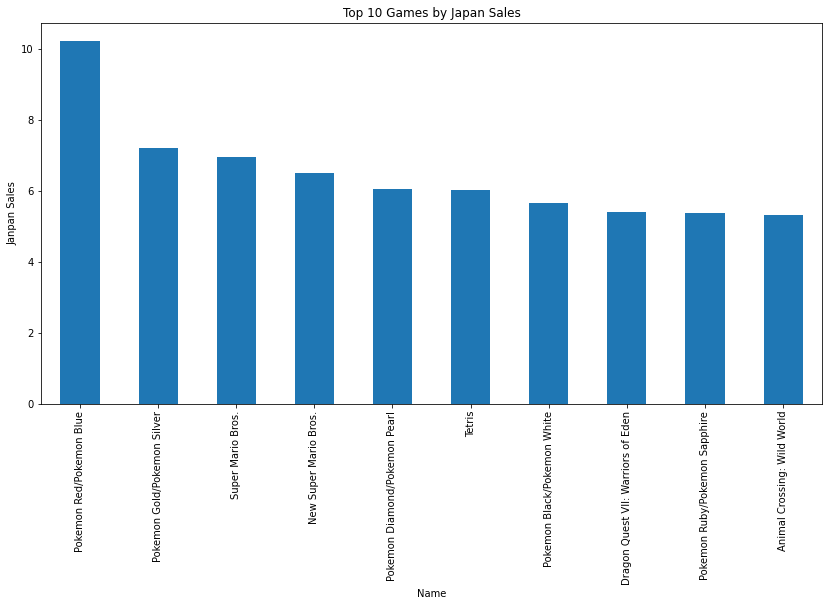

In [42]:
# Sorting the sales in descending order
JP_Sales = JP_Sales.sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(14, 7))
JP_Sales.head(10).plot(kind='bar')
plt.xlabel('Name')
plt.ylabel('Janpan Sales')
plt.title('Top 10 Games by Japan Sales')
plt.show()

In Japan, cartoon-based games are highly beloved, and among the most popular titles are Pokémon Red and Pokémon Gold. These games have garnered immense popularity and have a dedicated fan base in Japan, showcasing the country's affinity for animated and collectible gaming experiences.

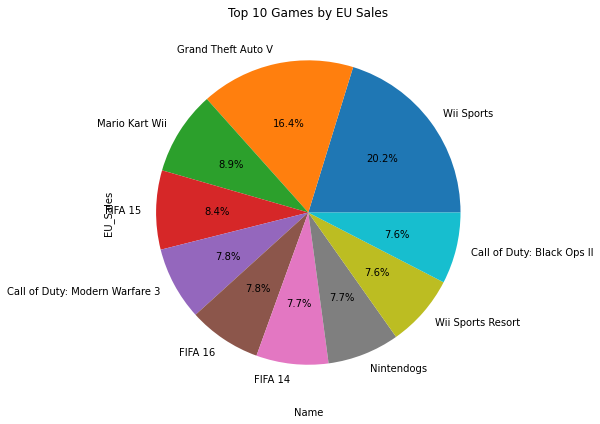

In [43]:
EU_Sales = EU_Sales.sort_values(ascending=False)

# Plotting the data with percentage values
plt.figure(figsize=(14, 7))
EU_Sales.head(10).plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('Name')
plt.title('Top 10 Games by EU Sales')
plt.show()


In Europe, sports games like FIFA 14, Wii Sports, FIFA 16, FIFA 15, and Wii Sports Resort are incredibly popular, contributing to around 50% of game sales. These titles resonate with European gamers, highlighting their strong preference for sports-themed gaming experiences.

# least popular games world wide

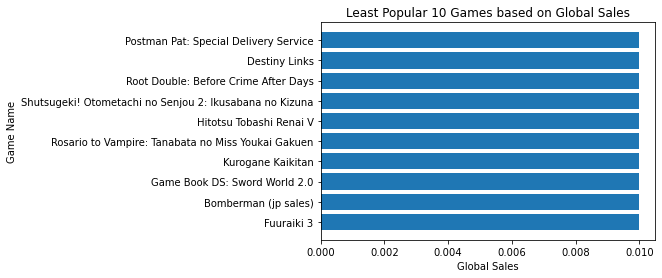

In [44]:

# Grouping data and calculating global sales
game_sales = df.groupby('Name')['Global_Sales'].sum().sort_values().head(10)

# Plotting the graph
plt.barh(game_sales.index, game_sales.values)
plt.xlabel('Global Sales')
plt.ylabel('Game Name')
plt.title('Least Popular 10 Games based on Global Sales')
plt.show()

thease all games overall low than 0.010 

# Conclusion 

In conclusion, the data from 1980 to 2020 reveals interesting insights into the video game industry. Action games have emerged as the most popular genre, with a significant number of copies sold, closely followed by sports games. This suggests that gamers are highly engaged in immersive and competitive experiences. Miscellaneous and role-playing games also performed well in terms of sales, indicating a diverse range of preferences among players. However, strategy and puzzle games faced challenges in attracting a large audience, indicating the need for innovative approaches to capture the interest of gamers.

Take-Two Interactive, known for publishing popular titles like Grand Theft Auto and NBA 2K, has a smaller game portfolio compared to other prominent studios. On the other hand, limited information is available about Saga's game publishing history.

Globally, a mix of iconic games such as FIFA, GTA 5, Super Mario Bros, Tetris, and Pokémon have achieved tremendous commercial success across different platforms. In Japan, the popularity of cartoon-based games like Pokémon Red and Pokémon Gold highlights the nation's fondness for animated and collectible gaming experiences. In Europe, the strong preference for sports games, as evident from the success of FIFA and Wii Sports series, showcases the region's enthusiasm for sports-themed gaming.

Overall, this data emphasizes the significance of understanding global and regional gaming preferences, as well as the need for continuous innovation and adaptation within the industry to meet changing consumer demands.